In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = 'redditSubmissions.csv.gz'
df = pd.read_csv(file_path, on_bad_lines='skip')


In [3]:
df.head()

,#image_id,unixtime,rawtime,title,total_votes,reddit_id,number_of_upvotes,subreddit,number_of_downvotes,localtime,score,number_of_comments,username
0,0,1.333172e+09,2012-03-31T12:40:39.590113-07:00,And here's a downvote.,63470.0,rmqjs,32657.0,funny,30813.0,1.333198e+09,1844.0,622.0,Animates_Everything
1,0,1.333178e+09,2012-03-31T14:16:01.093638-07:00,Expectation,35.0,rmun4,29.0,GifSound,6.0,1.333203e+09,23.0,3.0,Gangsta_Raper
2,0,1.333200e+09,2012-03-31T20:18:33.192906-07:00,Downvote,41.0,rna86,32.0,GifSound,9.0,1.333225e+09,23.0,0.0,Gangsta_Raper
3,0,1.333252e+09,2012-04-01T10:52:10-07:00,Every time I downvote something,10.0,ro7e4,6.0,GifSound,4.0,1.333278e+09,2.0,0.0,Gangsta_Raper
4,0,1.333273e+09,2012-04-01T16:35:54.393381-07:00,Downvote &quot;Dies Irae&quot;,65.0,rooof,57.0,GifSound,8.0,1.333298e+09,49.0,0.0,Gangsta_Raper


In [4]:
df.shape

(132303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132303 entries, 0 to 132302
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #image_id            132303 non-null  int64  
 1   unixtime             132302 non-null  float64
 2   rawtime              132302 non-null  object 
 3   title                132302 non-null  object 
 4   total_votes          132302 non-null  float64
 5   reddit_id            132302 non-null  object 
 6   number_of_upvotes    132302 non-null  float64
 7   subreddit            132302 non-null  object 
 8   number_of_downvotes  132302 non-null  float64
 9   localtime            132302 non-null  float64
 10  score                132302 non-null  float64
 11  number_of_comments   132302 non-null  float64
 12  username             112043 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 13.1+ MB


In [6]:
df.describe()

,#image_id,unixtime,total_votes,number_of_upvotes,number_of_downvotes,localtime,score,number_of_comments
count,132303.000000,1.323020e+05,132302.000000,132302.000000,132302.000000,1.323020e+05,132302.000000,132302.000000
mean,10260.296441,1.340019e+09,1883.245748,1058.182900,825.062849,1.340036e+09,233.120051,39.063400
std,7317.407802,1.294615e+07,5970.693071,3181.146483,2796.540029,1.294027e+07,481.126196,142.742878
min,0.000000,1.217219e+09,0.000000,0.000000,0.000000,1.217244e+09,-264.000000,-1.000000
25%,3807.000000,1.333785e+09,15.000000,8.000000,6.000000,1.333811e+09,2.000000,0.000000
50%,9041.000000,1.344574e+09,45.000000,30.000000,14.000000,1.344599e+09,16.000000,3.000000
75%,16021.000000,1.348950e+09,376.000000,276.000000,96.000000,1.348952e+09,169.000000,15.000000
max,25887.000000,1.359095e+09,177103.000000,90396.000000,86707.000000,1.359095e+09,20570.000000,8357.000000


In [36]:


# Convert Unix timestamp to datetime
df['datetime'] = pd.to_datetime(df['unixtime'], unit='s')

# Find the earliest and latest dates
earliest_date = df['datetime'].min()
latest_date = df['datetime'].max()

# Print the timeframe
print(f"The dataset spans from {earliest_date} to {latest_date}.")


The dataset spans from 2008-07-28 04:26:54 to 2013-01-25 06:27:33.


How many users/submissions are there?

In [27]:
unique_users = df['username'].nunique()
unique_submissions = df['reddit_id'].nunique()
print(f"Unique Users: {unique_users}")
print(f"Unique Submissions: {unique_submissions}")


Unique Users: 63334
Unique Submissions: 132209


How does activity differ across subreddits?

In [28]:
subreddit_activity = df.groupby('subreddit').agg({'reddit_id': 'count', 
                                                  'number_of_comments': 'mean', 
                                                  'total_votes': 'mean'})
print(subreddit_activity)


                 reddit_id  number_of_comments  total_votes
subreddit                                                  
2006Scape                1            0.000000    17.000000
2XLite                   1            0.000000    30.000000
30ROCK                   1            7.000000   619.000000
311                      1            3.000000    16.000000
4chan                  122          107.516393  5462.770492
...                    ...                 ...          ...
xkcd                     1           34.000000   390.000000
youtubecomments          5            6.200000   296.800000
zelda                   14           23.285714   854.928571
zoidberg                 1            3.000000    38.000000
zombies                 18           40.722222   936.888889

[867 rows x 3 columns]


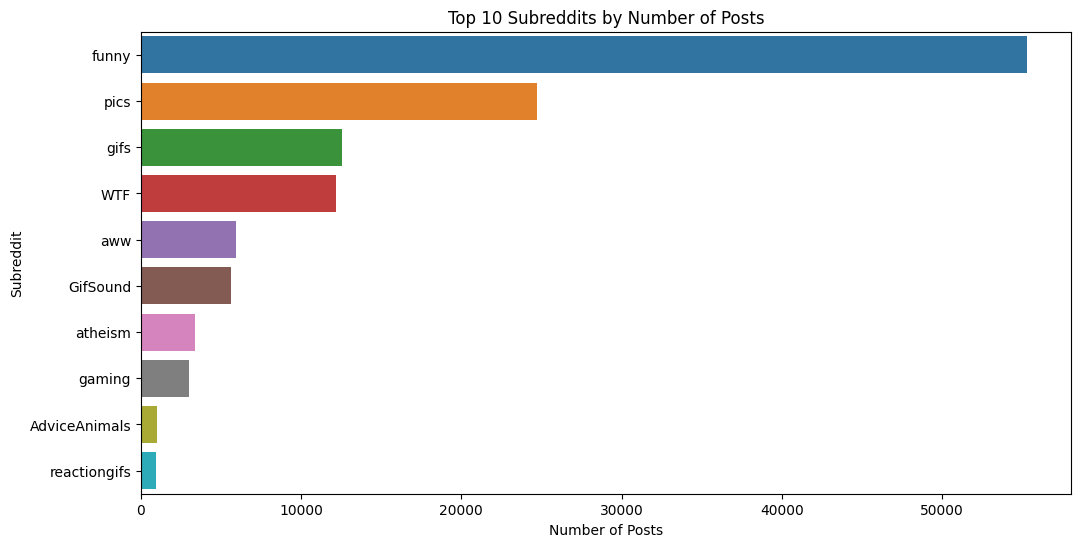

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

subreddit_activity = df.groupby('subreddit').agg({'reddit_id': 'count', 
                                                  'number_of_comments': 'mean', 
                                                  'total_votes': 'mean'}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='reddit_id', y='subreddit', data=subreddit_activity.sort_values('reddit_id', ascending=False).head(10))
plt.title('Top 10 Subreddits by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.show()


What times of day are submissions most commented on
or most rated?

In [29]:
df['hour'] = pd.to_datetime(df['unixtime'], unit='s').dt.hour
time_activity = df.groupby('hour').agg({'number_of_comments': 'mean', 
                                        'total_votes': 'mean'})
print(time_activity)
df['hour'] = pd.to_datetime(df['unixtime'], unit='s').dt.hour
time_activity = df.groupby('hour').agg({'number_of_comments': 'mean', 
                                        'total_votes': 'mean'})
print(time_activity)


      number_of_comments  total_votes
hour                                 
0              45.473157  2360.048760
1              43.623213  2192.787601
2              41.297718  2051.217842
3              39.914022  1935.878558
4              40.692296  1772.292120
5              37.117949  1733.690705
6              36.397831  1635.377690
7              35.665727  1670.408811
8              35.126333  1638.834498
9              38.675978  1825.715469
10             38.481956  1806.055138
11             41.212236  1937.049991
12             39.332940  1831.803608
13             37.146441  1707.925385
14             34.117755  1753.626915
15             36.425554  1731.409187
16             31.310100  1654.394763
17             36.649850  1727.002147
18             31.034780  1558.889245
19             36.282268  1789.602835
20             37.254286  1826.929244
21             42.095117  2167.116536
22             47.545532  2272.399446
23             50.969603  2519.805713
      number

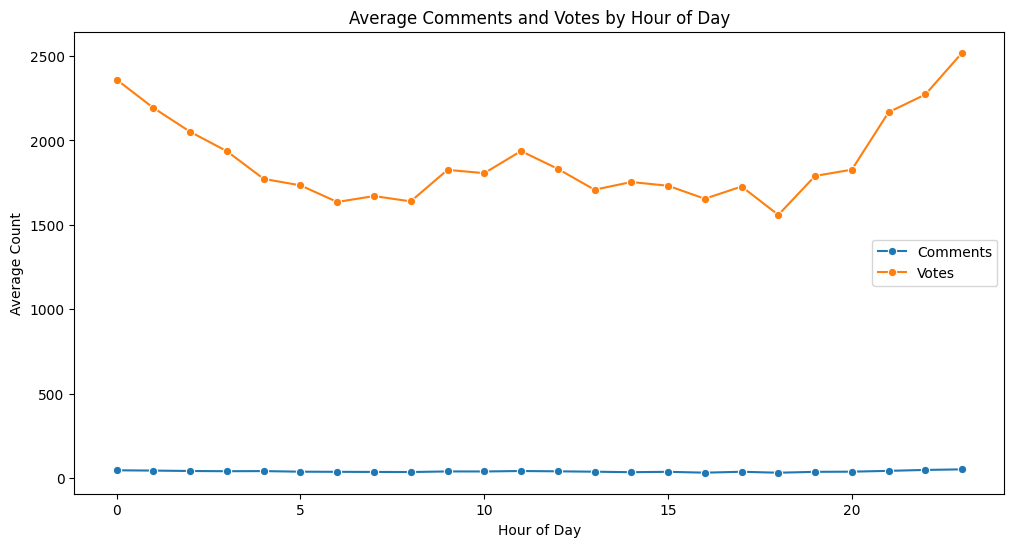

In [33]:
df['hour'] = pd.to_datetime(df['unixtime'], unit='s').dt.hour
time_activity = df.groupby('hour').agg({'number_of_comments': 'mean', 
                                        'total_votes': 'mean'}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='hour', y='number_of_comments', data=time_activity, marker='o', label='Comments')
sns.lineplot(x='hour', y='total_votes', data=time_activity, marker='o', label='Votes')
plt.title('Average Comments and Votes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.legend()
plt.show()


Do people give more/fewer votes to submissions that
have long/short titles, 

In [30]:
df['title_length'] = df['title'].str.len()
title_length_votes = df.groupby('title_length')['total_votes'].mean()
print(title_length_votes)


title_length
1       596.166667
2      1951.877358
3      1897.139752
4      2042.521552
5      1745.232162
          ...     
296     394.200000
297    2789.000000
299      11.000000
300    4136.250000
313      15.500000
Name: total_votes, Length: 260, dtype: float64


In [31]:
df['contains_help'] = df['title'].str.contains('help', case=False, na=False)
help_votes = df.groupby('contains_help')['total_votes'].mean()
print(help_votes)


contains_help
False    1882.268331
True     2169.633333
Name: total_votes, dtype: float64


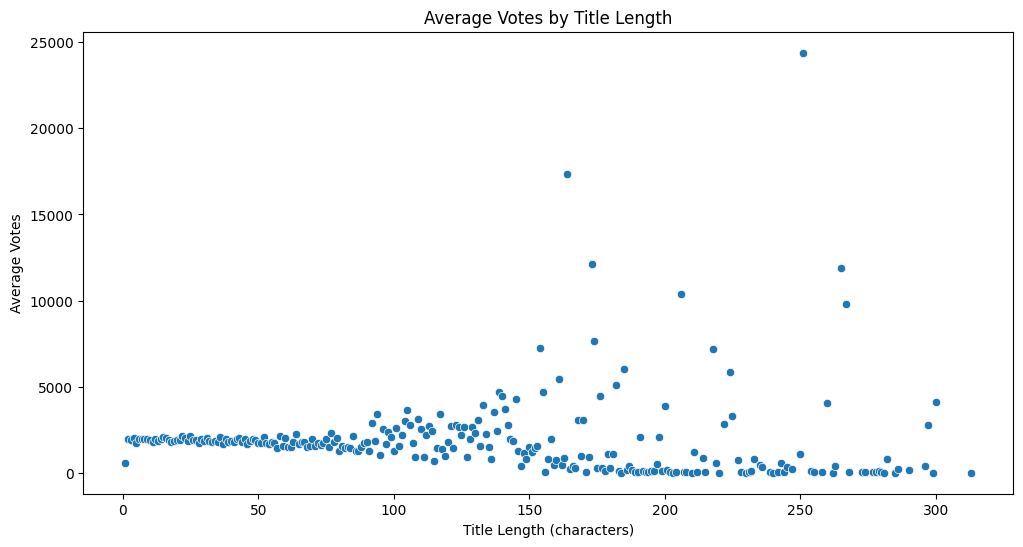

In [34]:
df['title_length'] = df['title'].str.len()
title_length_votes = df.groupby('title_length')['total_votes'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(x='title_length', y='total_votes', data=title_length_votes)
plt.title('Average Votes by Title Length')
plt.xlabel('Title Length (characters)')
plt.ylabel('Average Votes')
plt.show()


Missing values 

In [11]:
print(df.isnull().sum())

#image_id                  0
unixtime                   1
rawtime                    1
title                      1
total_votes                1
reddit_id                  1
number_of_upvotes          1
subreddit                  1
number_of_downvotes        1
localtime                  1
score                      1
number_of_comments         1
username               20260
dtype: int64


Username column has 20260 missing values, rest just have 1 missing value 

In [12]:
df = df.dropna(subset=['unixtime', 'rawtime', 'title', 'total_votes', 'reddit_id', 'number_of_upvotes', 'subreddit', 'number_of_downvotes', 'localtime', 'score', 'number_of_comments'])


Imputation: For numerical columns like total_votes, number_of_upvotes, number_of_downvotes, localtime, score, and number_of_comments, We have imputed the missing value with the mean of the column. For categorical columns like title and subreddit, we impute with the mode (most frequent value).

In [13]:
# Example for numerical column
df['total_votes'].fillna(df['total_votes'].mean(), inplace=True)

# Example for categorical column
df['title'].fillna(df['title'].mode()[0], inplace=True)


Missing values in username

In [14]:
df['username'].fillna('Unknown', inplace=True)


Data Visualization

In [18]:
df.columns

Index(['#image_id', 'unixtime', 'rawtime', 'title', 'total_votes', 'reddit_id',
       'number_of_upvotes', 'subreddit', 'number_of_downvotes', 'localtime',
       'score', 'number_of_comments', 'username'],
      dtype='object')

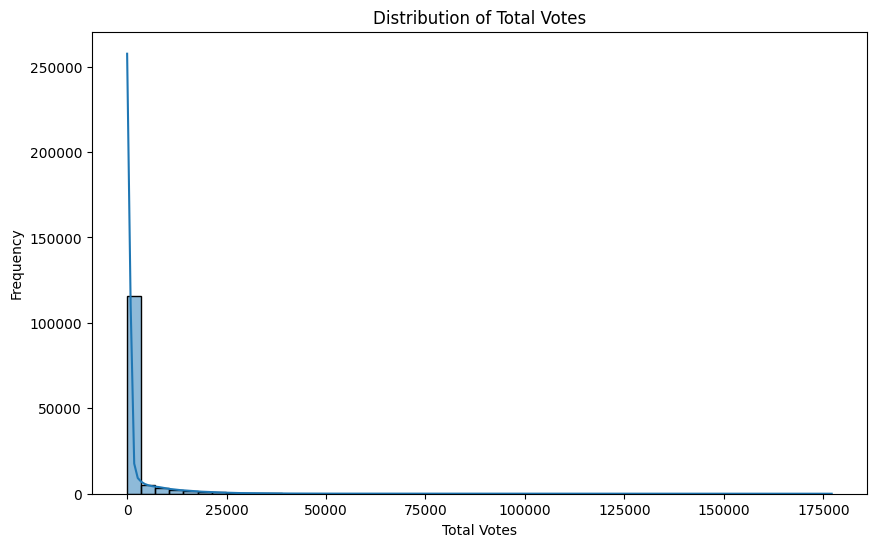

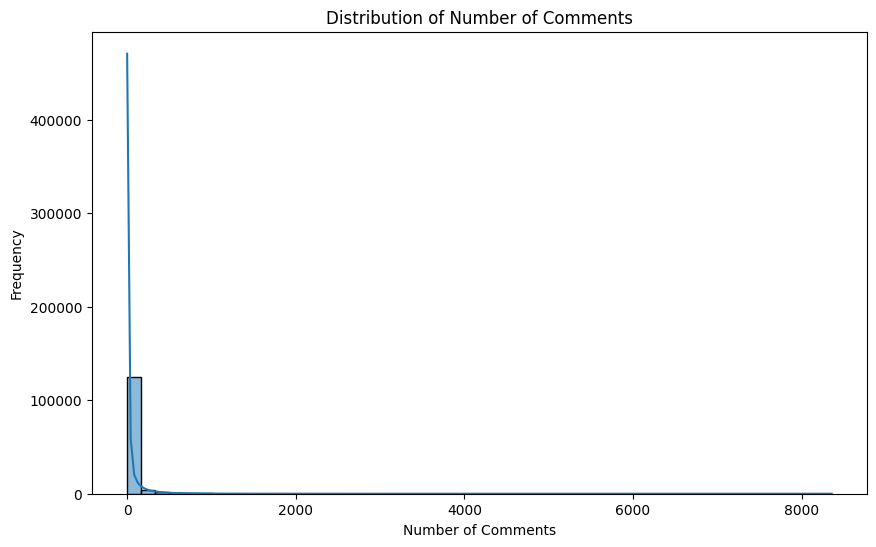

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Total Votes
plt.figure(figsize=(10, 6))
sns.histplot(df['total_votes'], bins=50, kde=True)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

# Histogram of Number of Comments
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_comments'], bins=50, kde=True)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


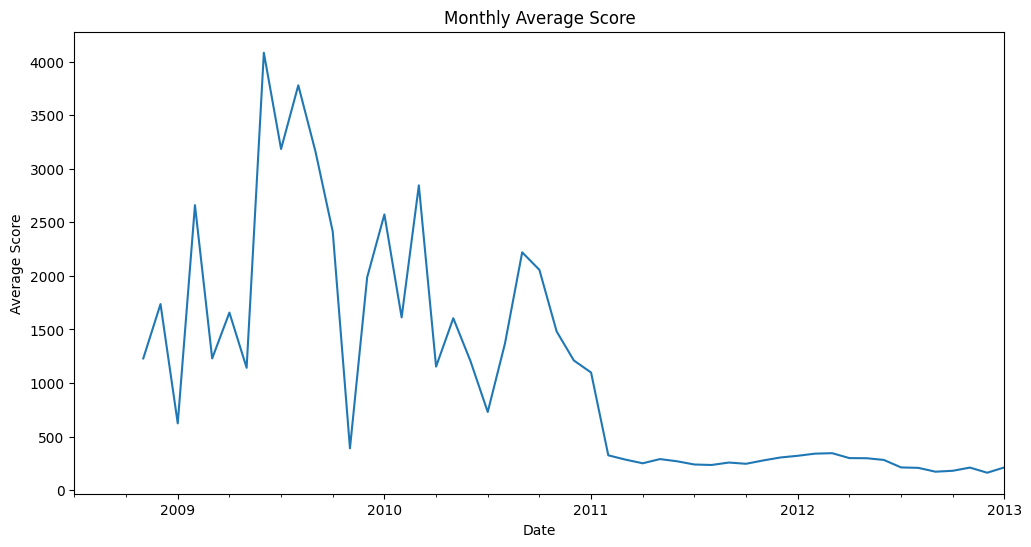

In [20]:
df['datetime'] = pd.to_datetime(df['unixtime'], unit='s')

# Time Series plot for Scores
plt.figure(figsize=(12, 6))
df.resample('M', on='datetime')['score'].mean().plot()
plt.title('Monthly Average Score')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.show()


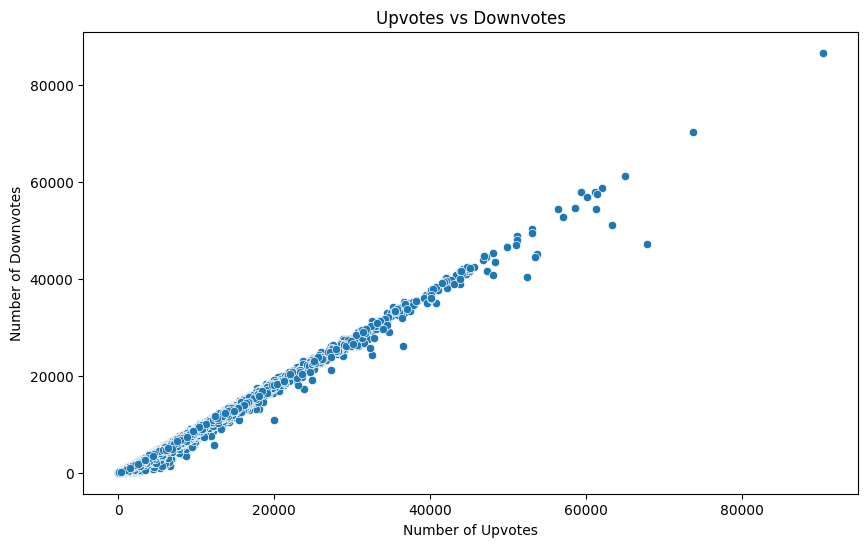

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_upvotes', y='number_of_downvotes', data=df)
plt.title('Upvotes vs Downvotes')
plt.xlabel('Number of Upvotes')
plt.ylabel('Number of Downvotes')
plt.show()


C:\Users\prash\AppData\Local\Temp\ipykernel_13244\3011635052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


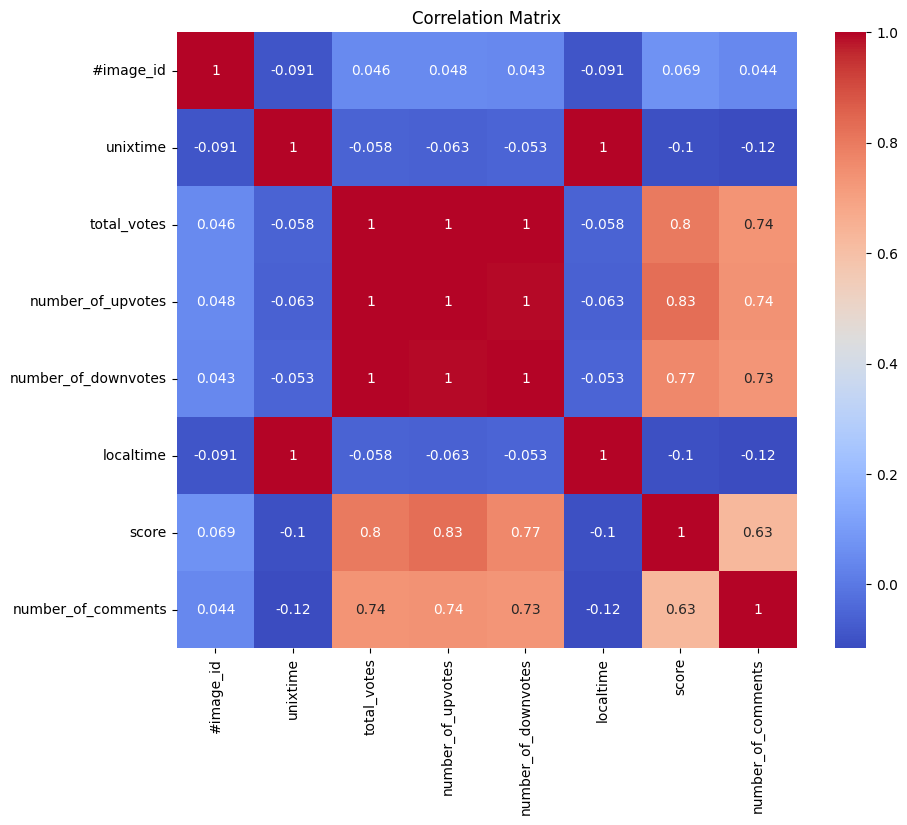

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


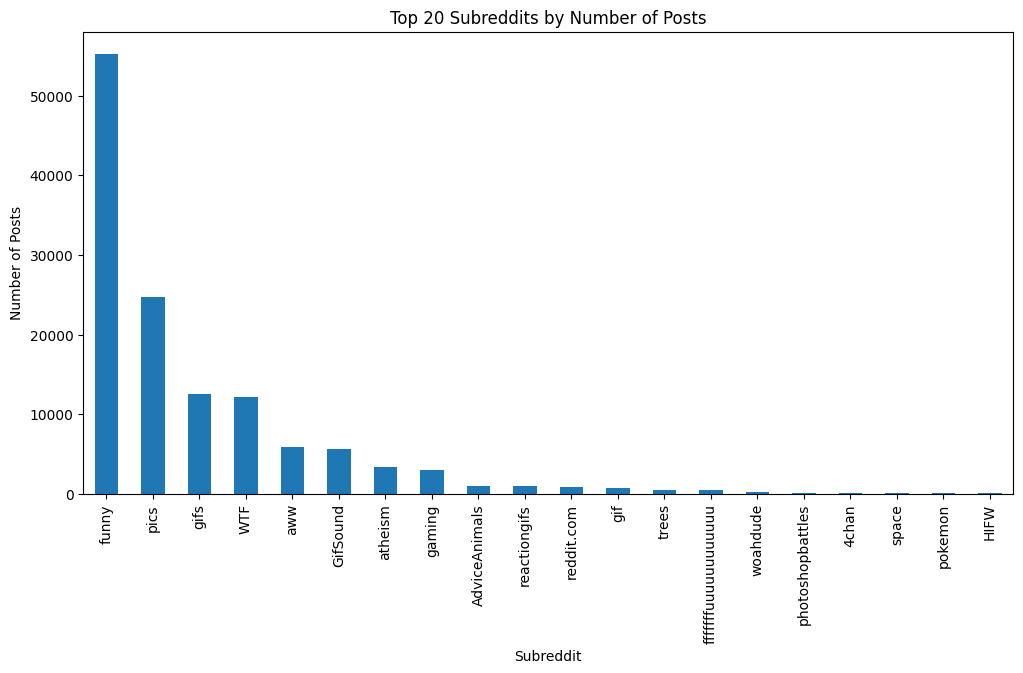

In [24]:
plt.figure(figsize=(12, 6))
df['subreddit'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Subreddits by Number of Posts')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.show()


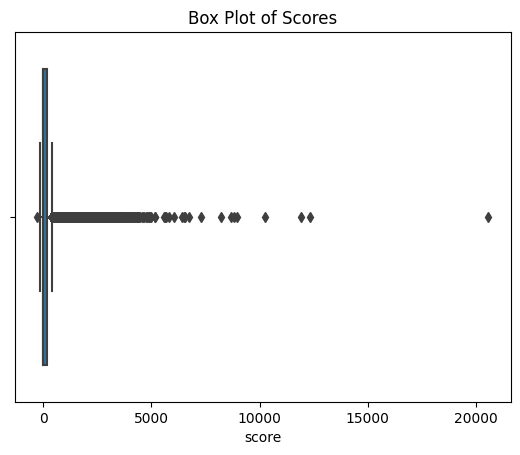

In [25]:
sns.boxplot(x=df['score'])
plt.title('Box Plot of Scores')
plt.show()


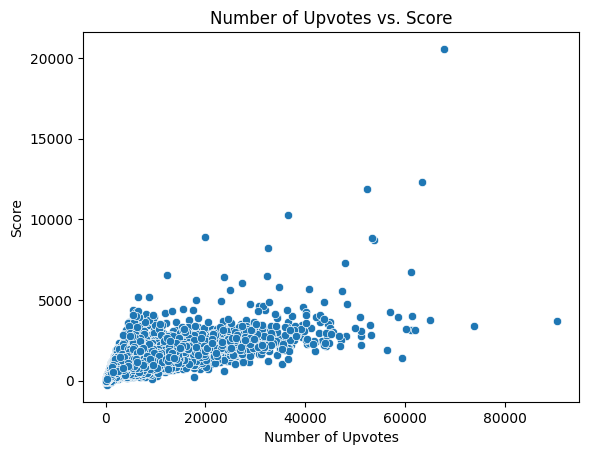

In [26]:
sns.scatterplot(x='number_of_upvotes', y='score', data=df)
plt.title('Number of Upvotes vs. Score')
plt.xlabel('Number of Upvotes')
plt.ylabel('Score')
plt.show()


Interesting Findings 

Positive Correlation Between Upvotes and Score: The scatter plot shows a positive relationship between the number of upvotes and the score. This is expected but confirms that the most direct path to a high score on a Reddit post is through upvotes.



Strong Correlation Between Engagement Metrics: The correlation matrix heatmap shows strong correlations between total votes, upvotes, and downvotes. This suggests that posts which receive a lot of upvotes also tend to attract downvotes, possibly due to increased visibility.

Top 20 Subreddits by Number of Posts Bar Chart: This visualization shows the subreddits with the highest number of posts. The 'funny' subreddit seems to have the most posts, followed by others like 'pics' and 'gifs'. This distribution can inform which subreddits are most active or popular.

The mean is significantly higher than the median (50th percentile) for total_votes, number_of_upvotes, number_of_downvotes, score, and number_of_comments, which indicates a right-skewed distribution. In practical terms, this means most of the posts receive relatively few interactions, with a small number of posts getting the majority of the engagement.

The score variable has a minimum value of -264, which implies that some posts have received more downvotes than upvotes.

The 75th percentile and maximum values for variables such as score and number_of_comments suggest the presence of outliers. For example, while the 75th percentile for scores is 169, the maximum is 20,570, indicating that some posts have exceptionally high scores.

